<a href="https://colab.research.google.com/github/zameerhossain/zameer/blob/master/sentiment_classification_using_speech_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wave

  Created wheel for wave: filename=Wave-0.0.2-cp36-none-any.whl size=1246 sha256=11de114c74cdcd893a56b7f96ff7bc345b569adb27bc2a7faed6ec825afd2743
  Stored in directory: /root/.cache/pip/wheels/8c/2e/ad/d96151afb1fdccf126346b26eabb91fec3c5ce5cbee7287fbf
Successfully built wave


In [2]:
!sudo apt-get install python-pyaudio

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-cufft-10-1 cuda-cufft-dev-10-1 cuda-curand-10-1 cuda-curand-dev-10-1
  cuda-cusolver-10-1 cuda-cusolver-dev-10-1 cuda-cusparse-10-1
  cuda-cusparse-dev-10-1 cuda-license-10-2 cuda-npp-10-1 cuda-npp-dev-10-1
  cuda-nsight-10-1 cuda-nsight-compute-10-1 cuda-nsight-systems-10-1
  cuda-nvgraph-10-1 cuda-nvgraph-dev-10-1 cuda-nvjpeg-10-1
  cuda-nvjpeg-dev-10-1 cuda-nvrtc-10-1 cuda-nvrtc-dev-10-1 cuda-nvvp-10-1
  libcublas10 libnvidia-common-430 nsight-compute-2019.5.0
  nsight-systems-2019.5.2
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libportaudio2
Suggested packages:
  python-pyaudio-doc
The following NEW packages will be installed:
  libportaudio2 python-pyaudio
0 upgraded, 2 newly installed, 0 to remove and 5 not upgraded.
Need to get 88.6 kB of archives

In [45]:
import os
import random
import sys


## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf
py.init_notebook_mode(connected=True)


## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical


## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

input_duration=3


In [4]:
!wget clone https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1

--2019-12-05 12:46:13--  http://clone/
Resolving clone (clone)... failed: Name or service not known.
wget: unable to resolve host address ‘clone’
--2019-12-05 12:46:13--  https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.95.95
Connecting to zenodo.org (zenodo.org)|188.184.95.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208468073 (199M) [application/octet-stream]
Saving to: ‘Audio_Speech_Actors_01-24.zip?download=1’

Audio_Speech_Actors 100%[===================>] 198.81M  24.4MB/s    in 9.0s    

2019-12-05 12:46:23 (22.1 MB/s) - ‘Audio_Speech_Actors_01-24.zip?download=1’ saved [208468073/208468073]

FINISHED --2019-12-05 12:46:23--
Total wall clock time: 10s
Downloaded: 1 files, 199M in 9.0s (22.1 MB/s)


In [0]:
!mv /content/Audio_Speech_Actors_01-24.zip?download=1 /content/datasets

In [6]:
!unzip /content/datasets/Audio_Speech_Actors_01-24.zip?download=1 -d /content/datasets

Archive:  /content/datasets/Audio_Speech_Actors_01-24.zip?download=1
   creating: /content/datasets/Actor_01/
  inflating: /content/datasets/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: /conte

In [0]:
!mv /content/datasets/Audio_Speech_Actors_01-24.zip?download=1 /content

In [19]:
dir_list = os.listdir('/content/datasets')
dir_list.sort()
print (dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [0]:
data_df = pd.DataFrame(columns=['path', 'source', 'actor', 'gender',
                                'intensity', 'statement', 'repetition', 'emotion'])
count = 0
for i in dir_list:
    file_list = os.listdir('/content/datasets/' + i)
    for f in file_list:
        nm = f.split('.')[0].split('-')
        path = '/content/datasets/' + i + '/' + f
        src = int(nm[1])
        actor = int(nm[-1])
        emotion = int(nm[2])
        
        if int(actor)%2 == 0:
            gender = "female"
        else:
            gender = "male"
        
        if nm[3] == '01':
            intensity = 0
        else:
            intensity = 1
        
        if nm[4] == '01':
            statement = 0
        else:
            statement = 1
        
        if nm[5] == '01':
            repeat = 0
        else:
            repeat = 1
            
        data_df.loc[count] = [path, src, actor, gender, intensity, statement, repeat, emotion]
        count += 1

In [184]:
print (len(data_df))
data_df



1440


,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/datasets/Actor_01/03-01-01-01-01-01-0...,1,1,male,0,0,0,1,male_none
1,/content/datasets/Actor_01/03-01-07-01-02-02-0...,1,1,male,0,1,1,7,male_none
2,/content/datasets/Actor_01/03-01-03-02-02-01-0...,1,1,male,1,1,0,3,male_positive
3,/content/datasets/Actor_01/03-01-06-02-01-01-0...,1,1,male,1,0,0,6,male_negative
4,/content/datasets/Actor_01/03-01-04-02-01-01-0...,1,1,male,1,0,0,4,male_negative
...,...,...,...,...,...,...,...,...,...
1435,/content/datasets/Actor_24/03-01-04-02-02-01-2...,1,24,female,1,1,0,4,female_negative
1436,/content/datasets/Actor_24/03-01-06-01-02-01-2...,1,24,female,0,1,0,6,female_negative
1437,/content/datasets/Actor_24/03-01-07-01-01-01-2...,1,24,female,0,0,0,7,female_none
1438,/content/datasets/Actor_24/03-01-02-01-01-01-2...,1,24,female,0,0,0,2,female_positive


In [185]:
len(samples), sample_rate


(84610, array(44100))

In [42]:
sample_rate/ len(samples)

0.26060749320411297

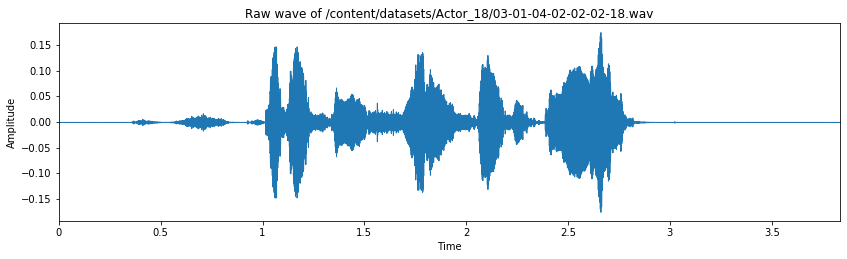

In [55]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)



In [0]:
aa , bb = librosa.effects.trim(samples, top_db=30)


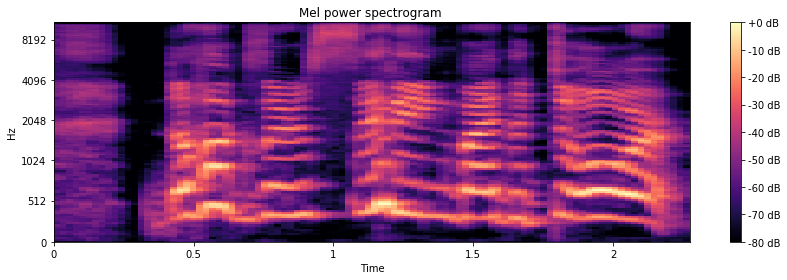

In [49]:
S = librosa.feature.melspectrogram(aa, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

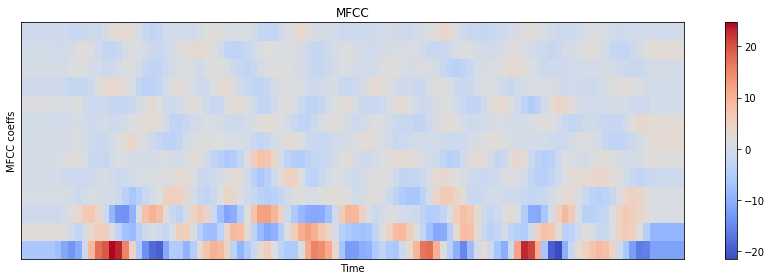

In [50]:

mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

delta2_mfcc = librosa.feature.delta(mfcc, order=2)
plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [190]:
data_df.emotion


0       1
1       7
2       3
3       6
4       4
       ..
1435    4
1436    6
1437    7
1438    2
1439    2
Name: emotion, Length: 1440, dtype: object

In [0]:
label8_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1:
        lb = "_neutral"
    elif data_df.emotion[i] == 2:
        lb = "_calm"
    elif data_df.emotion[i] == 3:
        lb = "_happy"
    elif data_df.emotion[i] == 4:
        lb = "_sad"
    elif data_df.emotion[i] == 5:
        lb = "_angry"
    elif data_df.emotion[i] == 6:
        lb = "_fearful"
    elif data_df.emotion[i] == 7:
        lb = "_disgust"
    elif data_df.emotion[i] == 8:
        lb = "_surprised"
    else:
        lb = "_none"
        

    # Add gender to the label 
    label8_list.append(data_df.gender[i]  + lb)
    


In [0]:
def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    tmp_df = pd.DataFrame()
    tmp_df['Emotion'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [294]:
y

0        male_neutral
1        male_disgust
2          male_happy
3        male_fearful
4            male_sad
            ...      
2235    male_positive
2236    male_negative
2237    male_negative
2238    male_positive
2239    male_negative
Name: label, Length: 2240, dtype: object

,path,source,actor,gender,intensity,statement,repetition,emotion,label,class
0,/content/datasets/Actor_01/03-01-01-01-01-01-0...,1,1,male,0,0,0,1,male_neutral,_none
1,/content/datasets/Actor_01/03-01-07-01-02-02-0...,1,1,male,0,1,1,7,male_disgust,_none
2,/content/datasets/Actor_01/03-01-03-02-02-01-0...,1,1,male,1,1,0,3,male_happy,_none
3,/content/datasets/Actor_01/03-01-06-02-01-01-0...,1,1,male,1,0,0,6,male_fearful,_none
4,/content/datasets/Actor_01/03-01-04-02-01-01-0...,1,1,male,1,0,0,4,male_sad,_none
...,...,...,...,...,...,...,...,...,...,...
1435,/content/datasets/Actor_24/03-01-04-02-02-01-2...,1,24,female,1,1,0,4,female_sad,11
1436,/content/datasets/Actor_24/03-01-06-01-02-01-2...,1,24,female,0,1,0,6,female_fearful,13
1437,/content/datasets/Actor_24/03-01-07-01-01-01-2...,1,24,female,0,0,0,7,female_disgust,14
1438,/content/datasets/Actor_24/03-01-02-01-01-01-2...,1,24,female,0,0,0,2,female_calm,9


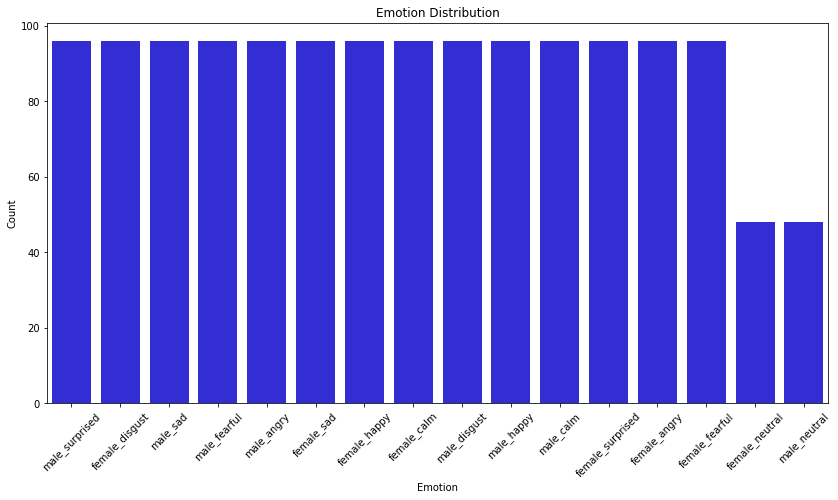

In [295]:
data_df['label'] = label8_list
a = data_df.label.value_counts()
plot_emotion_dist(a, "#1913ee", "Emotion Distribution")
data_df

In [0]:
label9_list = []
for i in range(len(data_df)):
    if data_df.label[i] == "male_neutral":
        lb1 = 0
    elif data_df.label[i] == "male_calm":
        lb1 = 1
    elif data_df.label[i] == "male_happy":
        lb1 = 2
    elif data_df.label[i] == "male_sad":
        lb1 = 3
    elif data_df.label[i] == "male_angry":
        lb1 = 4
    elif data_df.label[i] == "male_fearful":
        lb1 = 5
    elif data_df.label[i] == "male_disgust":
        lb1 = 6
    elif data_df.label[i] == "male_surprised":
        lb1 = 7
    elif data_df.label[i] == "female_neutral":
        lb1 = 8
    elif data_df.label[i] == "female_calm":
        lb1 = 9
    elif data_df.label[i] == "female_happy":
        lb1 = 10
    elif data_df.label[i] == "female_sad":
        lb1 = 11
    elif data_df.label[i] == "female_angry":
        lb1 = 12
    elif data_df.label[i] == "female_fearful":
        lb1 = 13
    elif data_df.label[i] == "female_disgust":
        lb1 = 14
    elif data_df.label[i] == "female_surprised":
        lb1 = 15    
    else:
        lb1 = "_none"
        

    # Add gender to the label 
    label9_list.append(lb1)

,path,source,actor,gender,intensity,statement,repetition,emotion,label,class,class1
0,/content/datasets/Actor_01/03-01-01-01-01-01-0...,1,1,male,0,0,0,1,male_neutral,0,0
1,/content/datasets/Actor_01/03-01-07-01-02-02-0...,1,1,male,0,1,1,7,male_disgust,6,6
2,/content/datasets/Actor_01/03-01-03-02-02-01-0...,1,1,male,1,1,0,3,male_happy,2,2
3,/content/datasets/Actor_01/03-01-06-02-01-01-0...,1,1,male,1,0,0,6,male_fearful,5,5
4,/content/datasets/Actor_01/03-01-04-02-01-01-0...,1,1,male,1,0,0,4,male_sad,3,3
...,...,...,...,...,...,...,...,...,...,...,...
1435,/content/datasets/Actor_24/03-01-04-02-02-01-2...,1,24,female,1,1,0,4,female_sad,11,11
1436,/content/datasets/Actor_24/03-01-06-01-02-01-2...,1,24,female,0,1,0,6,female_fearful,13,13
1437,/content/datasets/Actor_24/03-01-07-01-01-01-2...,1,24,female,0,0,0,7,female_disgust,14,14
1438,/content/datasets/Actor_24/03-01-02-01-01-01-2...,1,24,female,0,0,0,2,female_calm,9,9


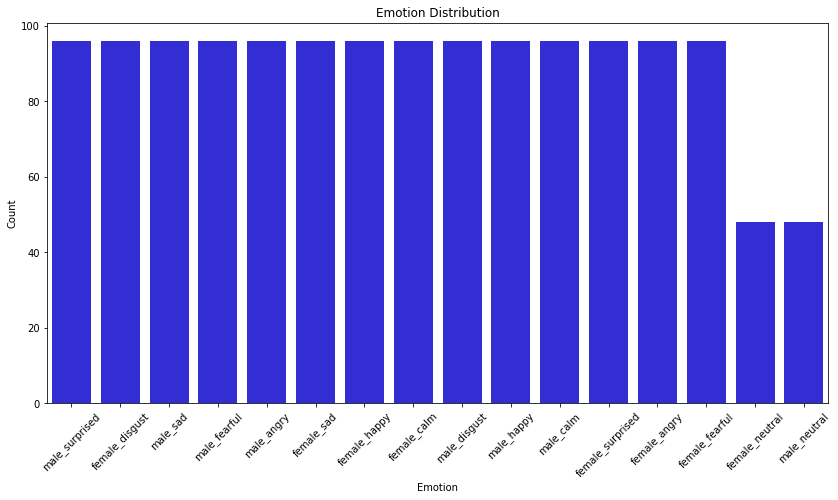

In [305]:
data_df['class1'] = label9_list
a = data_df.label.value_counts()
plot_emotion_dist(a, "#1913ee", "Emotion Distribution")
data_df

In [306]:
data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=25), axis=0)
    feature = mfccs
    data.loc[i] = [feature]
    




  0%|          | 0/1440 [00:00<?, ?it/s]


  0%|          | 1/1440 [00:00<08:30,  2.82it/s]


  0%|          | 2/1440 [00:00<08:30,  2.82it/s]


  0%|          | 3/1440 [00:01<08:43,  2.74it/s]


  0%|          | 4/1440 [00:01<08:40,  2.76it/s]


  0%|          | 5/1440 [00:01<08:34,  2.79it/s]


  0%|          | 6/1440 [00:02<08:41,  2.75it/s]


  0%|          | 7/1440 [00:02<08:37,  2.77it/s]


  1%|          | 8/1440 [00:02<08:38,  2.76it/s]


  1%|          | 9/1440 [00:03<08:38,  2.76it/s]


  1%|          | 10/1440 [00:03<08:38,  2.76it/s]


  1%|          | 11/1440 [00:03<08:42,  2.74it/s]


  1%|          | 12/1440 [00:04<08:41,  2.74it/s]


  1%|          | 13/1440 [00:04<08:34,  2.77it/s]


  1%|          | 14/1440 [00:05<08:37,  2.76it/s]


  1%|          | 15/1440 [00:05<08:43,  2.72it/s]


  1%|          | 16/1440 [00:05<08:41,  2.73it/s]


  1%|          | 17/1440 [00:06<08:39,  2.74it/s]


  1%|▏         | 18/1440 [00:06<08:37,  2.75it/s]


  1%|▏         | 19/1440 [0

In [307]:
df3 = pd.DataFrame(data['feature'].values.tolist())
labels = data_df.class1
df3.head()
newdf = pd.concat([df3,labels], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})
rnewdf.isnull().sum().sum()
rnewdf = rnewdf.fillna(0)
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,class1
0,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.209389,-34.216505,-34.216505,-34.216505,-32.598913,-30.371122,-30.703240,-29.304954,-30.364682,-29.800321,-29.186496,-29.337674,-27.968956,-28.676781,-27.200318,-26.450777,-27.202587,-26.920515,-26.190021,-26.323636,-27.585917,-28.089647,-26.799970,-26.042148,...,-33.851507,-34.216505,-33.720860,-32.923314,-31.627832,-32.840738,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,-34.166932,-33.345329,-32.892185,-32.983053,-31.110471,-32.476370,-34.738546,-33.989642,-32.960132,-33.725357,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-32.866158,-29.428630,-29.228239,-31.927594,-32.520485,-34.094630,-34.647873,-33.520989,-32.823917,-33.422970,-34.337175,-34.738546,-34.567976,-31.883702,-31.601776,...,-33.393363,-33.116724,-32.235753,-31.450792,-32.880961,-33.063138,-30.944097,-32.234038,-34.738546,-33.656325,-30.599559,-30.007357,-30.325963,-30.244359,-32.530808,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,6
2,-28.048063,-27.464011,-26.250901,-26.466697,-27.565265,-27.741430,-26.587774,-25.547479,-25.046852,-23.729354,-24.055691,-25.075132,-24.228154,-23.734431,-23.502040,-22.678158,-22.543209,-22.116591,-22.669961,-22.721110,-22.700558,-23.500977,-24.146003,-25.061236,-25.495407,-25.534513,-27.193321,-25.918841,-25.824458,-24.927646,-25.037006,-25.519422,-26.104916,-25.879847,-25.986527,-25.426663,-23.655680,-22.950630,-24.163361,-24.429152,...,-24.326140,-24.882437,-25.176846,-24.946070,-23.899557,-24.216753,-26.186776,-25.389184,-25.048960,-25.601170,-27.144173,-27.406380,-23.429729,-23.251807,-25.100683,-25.200970,-23.961843,-23.592799,-26.327543,-25.851060,-24.664492,-25.194503,-25.109885,-25.043791,-26.695816,-28.234867,-28.405320,-28.405320,-27.397529,-27.505917,-26.892452,-26.110753,-25.759809,-27.569992,-27.937804,-26.843350,-26.707673,-26.385983,-27.427260,2
3,-23.485452,-23.107996,-22.176963,-21.423119,-22.017377,-22.044640,-21.926186,-21.232818,-22.138719,-23.860718,-24.392311,-22.462134,-21.370654,-21.425639,-22.223827,-21.379001,-20.747335,-21.715174,-24.534485,-26.112136,-24.578422,-22.640032,-22.813194,-21.398397,-20.613498,-16.852634,-14.854302,-15.333972,-14.584897,-13.171269,-12.727882,-12.489028,-12.459122,-13.388868,-15.561130,-17.893561,-15.755460,-12.648778,-10.431125,-9.836183,...,-21.455881,-20.754574,-21.963953,-20.549233,-20.676303,-21.356896,-17.769328,-14.306879,-14.480455,-17.751659,-18.596429,-17.977362,-18.455918,-18.111698,-17.582250,-18.973372,-16.355540,-16.332658,-18.169713,-17.836721,-19.225194,-19.935436,-20.128815,-18.860520,-17.235066,-17.328389,-16.730782,-16.658967,-18.153206,-15.082284,-12.144402,-12.253197,-14.802129,-16.667624,-16.780518,-18.287548,-18.863814,-13.088386,-8.207407,5
4,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.049673,-33.681549,-34.108633,-32.957766,-32.932065,-34.193056,-34.027128,-33.856938,-34.054732,-34.193056,-34.193056,-34.16

In [0]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
    """
    Streching the Sound.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.5,high=3)
    return (data * dyn_change)
    
def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.0  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

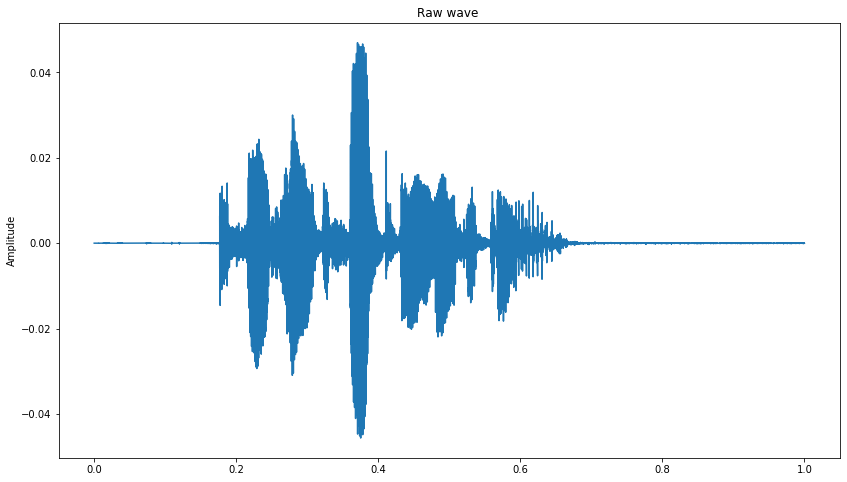

In [309]:
X, sample_rate = librosa.load(data_df.path[216], res_type='kaiser_fast',duration=4,sr=22050*2,offset=0.5)
plot_time_series(X)
ipd.Audio(X, rate=sample_rate)

In [310]:
syn_data1 = pd.DataFrame(columns=['feature', 'class1'])
for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data_df.class1[i]:
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data1.loc[i] = [feature, data_df.class1[i]]




  0%|          | 0/1440 [00:00<?, ?it/s]


  0%|          | 1/1440 [00:00<08:49,  2.72it/s]


  0%|          | 2/1440 [00:00<08:43,  2.75it/s]


  0%|          | 3/1440 [00:01<08:38,  2.77it/s]


  0%|          | 4/1440 [00:01<08:46,  2.73it/s]


  0%|          | 5/1440 [00:01<08:47,  2.72it/s]


  0%|          | 6/1440 [00:02<08:49,  2.71it/s]


  0%|          | 7/1440 [00:02<08:49,  2.71it/s]


  1%|          | 8/1440 [00:02<08:52,  2.69it/s]


  1%|          | 9/1440 [00:03<08:52,  2.69it/s]


  1%|          | 10/1440 [00:03<08:50,  2.70it/s]


  1%|          | 11/1440 [00:04<08:49,  2.70it/s]


  1%|          | 12/1440 [00:04<08:54,  2.67it/s]


  1%|          | 13/1440 [00:04<08:50,  2.69it/s]


  1%|          | 14/1440 [00:05<08:43,  2.72it/s]


  1%|          | 15/1440 [00:05<08:50,  2.68it/s]


  1%|          | 16/1440 [00:05<08:47,  2.70it/s]


  1%|          | 17/1440 [00:06<08:42,  2.72it/s]


  1%|▏         | 18/1440 [00:06<08:47,  2.70it/s]


  1%|▏         | 19/1440 [0

In [311]:
syn_data2 = pd.DataFrame(columns=['feature', 'class1'])
for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data_df.class1[i]:
        X = pitch(X, sample_rate)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data2.loc[i] = [feature, data_df.class1[i]]




  0%|          | 0/1440 [00:00<?, ?it/s]


  0%|          | 1/1440 [00:00<07:59,  3.00it/s]


  0%|          | 2/1440 [00:00<09:51,  2.43it/s]


  0%|          | 3/1440 [00:01<11:11,  2.14it/s]


  0%|          | 4/1440 [00:02<11:58,  2.00it/s]


  0%|          | 5/1440 [00:02<12:28,  1.92it/s]


  0%|          | 6/1440 [00:03<12:53,  1.85it/s]


  0%|          | 7/1440 [00:03<13:19,  1.79it/s]


  1%|          | 8/1440 [00:04<13:39,  1.75it/s]


  1%|          | 9/1440 [00:05<13:27,  1.77it/s]


  1%|          | 10/1440 [00:05<13:35,  1.75it/s]


  1%|          | 11/1440 [00:06<13:39,  1.74it/s]


  1%|          | 12/1440 [00:06<13:47,  1.73it/s]


  1%|          | 13/1440 [00:07<13:48,  1.72it/s]


  1%|          | 14/1440 [00:07<13:54,  1.71it/s]


  1%|          | 15/1440 [00:08<13:58,  1.70it/s]


  1%|          | 16/1440 [00:09<14:07,  1.68it/s]


  1%|          | 17/1440 [00:09<14:12,  1.67it/s]


  1%|▏         | 18/1440 [00:10<14:08,  1.68it/s]


  1%|▏         | 19/1440 [0

In [0]:
data2_df=data_df


In [0]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)

In [328]:
df4 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels4 = syn_data1.class1
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "class1"})
syndf1 = syndf1.fillna(0)
len(syndf1)

1392

In [329]:
df4 = pd.DataFrame(syn_data2['feature'].values.tolist())
labels4 = syn_data2.class1
syndf2 = pd.concat([df4,labels4], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "class1"})
syndf2 = syndf2.fillna(0)
len(syndf2)

1392

In [330]:
combined_df = pd.concat([rnewdf, syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,class1
0,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.209389,-34.216505,-34.216505,-34.216505,-32.598913,-30.371122,-30.703240,-29.304954,-30.364682,-29.800321,-29.186496,-29.337674,-27.968956,-28.676781,-27.200318,-26.450777,-27.202587,-26.920515,-26.190021,-26.323636,-27.585917,-28.089647,-26.799970,-26.042148,...,-33.851507,-34.216505,-33.720860,-32.923314,-31.627832,-32.840738,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,-34.216505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,-34.166932,-33.345329,-32.892185,-32.983053,-31.110471,-32.476370,-34.738546,-33.989642,-32.960132,-33.725357,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-32.866158,-29.428630,-29.228239,-31.927594,-32.520485,-34.094630,-34.647873,-33.520989,-32.823917,-33.422970,-34.337175,-34.738546,-34.567976,-31.883702,-31.601776,...,-33.393363,-33.116724,-32.235753,-31.450792,-32.880961,-33.063138,-30.944097,-32.234038,-34.738546,-33.656325,-30.599559,-30.007357,-30.325963,-30.244359,-32.530808,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,-34.738546,6
2,-28.048063,-27.464011,-26.250901,-26.466697,-27.565265,-27.741430,-26.587774,-25.547479,-25.046852,-23.729354,-24.055691,-25.075132,-24.228154,-23.734431,-23.502040,-22.678158,-22.543209,-22.116591,-22.669961,-22.721110,-22.700558,-23.500977,-24.146003,-25.061236,-25.495407,-25.534513,-27.193321,-25.918841,-25.824458,-24.927646,-25.037006,-25.519422,-26.104916,-25.879847,-25.986527,-25.426663,-23.655680,-22.950630,-24.163361,-24.429152,...,-24.326140,-24.882437,-25.176846,-24.946070,-23.899557,-24.216753,-26.186776,-25.389184,-25.048960,-25.601170,-27.144173,-27.406380,-23.429729,-23.251807,-25.100683,-25.200970,-23.961843,-23.592799,-26.327543,-25.851060,-24.664492,-25.194503,-25.109885,-25.043791,-26.695816,-28.234867,-28.405320,-28.405320,-27.397529,-27.505917,-26.892452,-26.110753,-25.759809,-27.569992,-27.937804,-26.843350,-26.707673,-26.385983,-27.427260,2
3,-23.485452,-23.107996,-22.176963,-21.423119,-22.017377,-22.044640,-21.926186,-21.232818,-22.138719,-23.860718,-24.392311,-22.462134,-21.370654,-21.425639,-22.223827,-21.379001,-20.747335,-21.715174,-24.534485,-26.112136,-24.578422,-22.640032,-22.813194,-21.398397,-20.613498,-16.852634,-14.854302,-15.333972,-14.584897,-13.171269,-12.727882,-12.489028,-12.459122,-13.388868,-15.561130,-17.893561,-15.755460,-12.648778,-10.431125,-9.836183,...,-21.455881,-20.754574,-21.963953,-20.549233,-20.676303,-21.356896,-17.769328,-14.306879,-14.480455,-17.751659,-18.596429,-17.977362,-18.455918,-18.111698,-17.582250,-18.973372,-16.355540,-16.332658,-18.169713,-17.836721,-19.225194,-19.935436,-20.128815,-18.860520,-17.235066,-17.328389,-16.730782,-16.658967,-18.153206,-15.082284,-12.144402,-12.253197,-14.802129,-16.667624,-16.780518,-18.287548,-18.863814,-13.088386,-8.207407,5
4,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.049673,-33.681549,-34.108633,-32.957766,-32.932065,-34.193056,-34.027128,-33.856938,-34.054732,-34.193056,-34.193056,-34.16

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
X = combined_df.drop(['class1'], axis=1)
y = combined_df.class1
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [0]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [334]:
X_train.shape

(3379, 259)

In [335]:
data2_df


,path,source,actor,gender,intensity,statement,repetition,emotion,label,class,class1
0,/content/datasets/Actor_01/03-01-01-01-01-01-0...,1,1,male,0,0,0,1,male_neutral,0,0
1,/content/datasets/Actor_01/03-01-07-01-02-02-0...,1,1,male,0,1,1,7,male_disgust,6,6
2,/content/datasets/Actor_01/03-01-03-02-02-01-0...,1,1,male,1,1,0,3,male_happy,2,2
3,/content/datasets/Actor_01/03-01-06-02-01-01-0...,1,1,male,1,0,0,6,male_fearful,5,5
4,/content/datasets/Actor_01/03-01-04-02-01-01-0...,1,1,male,1,0,0,4,male_sad,3,3
...,...,...,...,...,...,...,...,...,...,...,...
1435,/content/datasets/Actor_24/03-01-04-02-02-01-2...,1,24,female,1,1,0,4,female_sad,11,11
1436,/content/datasets/Actor_24/03-01-06-01-02-01-2...,1,24,female,0,1,0,6,female_fearful,13,13
1437,/content/datasets/Actor_24/03-01-07-01-01-01-2...,1,24,female,0,0,0,7,female_disgust,14,14
1438,/content/datasets/Actor_24/03-01-02-01-01-01-2...,1,24,female,0,0,0,2,female_calm,9,9


In [0]:


x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)



In [0]:
from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [340]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D ,BatchNormalization
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
from keras import regularizers






model = Sequential()
model.add(Conv1D(64, 8, padding='same',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(256, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(512, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(512, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(512, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
# Edit according to target class no.
model.add(Dense(16))
model.add(Activation('softmax'))
opt = keras.optimizers.Adam(lr=0.0001)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', fscore])


Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_177 (Conv1D)          (None, 259, 64)           576       
_________________________________________________________________
activation_199 (Activation)  (None, 259, 64)           0         
_________________________________________________________________
conv1d_178 (Conv1D)          (None, 259, 128)          65664     
_________________________________________________________________
batch_normalization_45 (Batc (None, 259, 128)          512       
_________________________________________________________________
activation_200 (Activation)  (None, 259, 128)          0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 259, 128)          0         
_________________________________________________________________
max_pooling1d_45 (MaxPooling (None, 32, 128)         

In [341]:
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
mcp_save = ModelCheckpoint('cnn_model', save_best_only=True, monitor='val_loss', mode='min')
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=20,
                     validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])

Train on 3379 samples, validate on 845 samples
Epoch 1/20
3379/3379 [==============================] - 16s 5ms/step - loss: 2.4175 - acc: 0.1933 - fscore: 0.0093 - val_loss: 2.4164 - val_acc: 0.1929 - val_fscore: 0.0022
Epoch 2/20
3379/3379 [==============================] - 10s 3ms/step - loss: 2.0491 - acc: 0.2874 - fscore: 0.0940 - val_loss: 2.1802 - val_acc: 0.2260 - val_fscore: 0.0022
Epoch 3/20
3379/3379 [==============================] - 9s 3ms/step - loss: 1.8479 - acc: 0.3498 - fscore: 0.1744 - val_loss: 2.1668 - val_acc: 0.2497 - val_fscore: 0.0134
Epoch 4/20
3379/3379 [==============================] - 9s 3ms/step - loss: 1.7252 - acc: 0.3960 - fscore: 0.2384 - val_loss: 2.0407 - val_acc: 0.3302 - val_fscore: 0.0670
Epoch 5/20
3379/3379 [==============================] - 9s 3ms/step - loss: 1.5876 - acc: 0.4410 - fscore: 0.2956 - val_loss: 1.8188 - val_acc: 0.3680 - val_fscore: 0.0996
Epoch 6/20
3379/3379 [==============================] - 9s 3ms/step - loss: 1.4313 - acc: 0

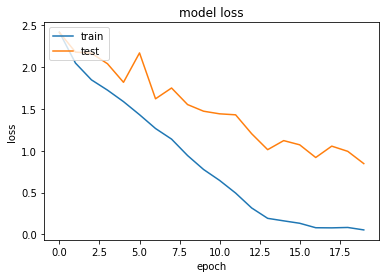

In [342]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [344]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("cnn_model")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 71.72%


In [345]:
data_test = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data3_df))):
    X, sample_rate = librosa.load(data3_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data_test.loc[i] = [feature]
    
test_valid = pd.DataFrame(data_test['feature'].values.tolist())
test_valid = np.array(test_valid)
test_valid_lb = np.array(data3_df.label)
lb = LabelEncoder()
test_valid_lb = np_utils.to_categorical(lb.fit_transform(test_valid_lb))
test_valid = np.expand_dims(test_valid, axis=2)




  0%|          | 0/80 [00:00<?, ?it/s]


  1%|▏         | 1/80 [00:00<00:34,  2.31it/s]


  2%|▎         | 2/80 [00:00<00:32,  2.41it/s]


  4%|▍         | 3/80 [00:01<00:31,  2.47it/s]


  5%|▌         | 4/80 [00:01<00:30,  2.53it/s]


  6%|▋         | 5/80 [00:01<00:29,  2.57it/s]


  8%|▊         | 6/80 [00:02<00:28,  2.61it/s]


  9%|▉         | 7/80 [00:02<00:27,  2.63it/s]


 10%|█         | 8/80 [00:03<00:26,  2.67it/s]


 11%|█▏        | 9/80 [00:03<00:26,  2.67it/s]


 12%|█▎        | 10/80 [00:03<00:26,  2.66it/s]


 14%|█▍        | 11/80 [00:04<00:25,  2.68it/s]


 15%|█▌        | 12/80 [00:04<00:25,  2.68it/s]


 16%|█▋        | 13/80 [00:04<00:24,  2.69it/s]


 18%|█▊        | 14/80 [00:05<00:24,  2.68it/s]


 19%|█▉        | 15/80 [00:05<00:24,  2.66it/s]


 20%|██        | 16/80 [00:06<00:23,  2.68it/s]


 21%|██▏       | 17/80 [00:06<00:23,  2.69it/s]


 22%|██▎       | 18/80 [00:06<00:23,  2.66it/s]


 24%|██▍       | 19/80 [00:07<00:22,  2.65it/s]


 25%|██▌       

In [346]:
preds = loaded_model.predict(test_valid, 
                         batch_size=16, 
                         verbose=1)

80/80 [==============================] - 2s 25ms/step


In [0]:
preds


In [358]:
preddf = pd.DataFrame({'predictedvalues': (lb.inverse_transform((preds.astype(int).flatten())))})


actual=test_valid_lb.argmax(axis=1)


actualdf = pd.DataFrame({'actualvalues': lb.inverse_transform((actual.astype(int).flatten()))})
finaldf = actualdf.join(preddf)
finaldf[50:80]

,actualvalues,predictedvalues
50,male_negative,male_negative
51,male_positive,male_negative
52,male_negative,male_negative
53,male_negative,male_negative
54,male_positive,male_negative
55,male_negative,male_negative
56,male_negative,male_negative
57,male_negative,male_negative
58,male_negative,male_negative
59,male_positive,male_negative
